In [1]:
import numpy as np
import matplotlib.pylab as P
from numpy import transpose
import matplotlib.pyplot
from sklearn import preprocessing
np.set_printoptions(threshold=np.inf)

In [4]:
n = np.load("/Users/janelabumanglag/FYP/models/research/audioset/snore.wav.npy")
p = np.load("/Users/janelabumanglag/FYP/models/research/audioset/long_applause.wav.npy")
a = np.load("/Users/janelabumanglag/FYP/models/research/audioset/short_applause.wav.npy")

In [5]:
# L2 norm on the query and example data
positive = preprocessing.normalize(p, norm='l2', axis=1)
negative = preprocessing.normalize(n, norm='l2', axis=1)
anchor = preprocessing.normalize(a, norm='l2', axis=1)

# Sum down the column to perform sum pooling
sum_anchor = np.sum(anchor, axis=0)
sum_positive = np.sum(positive, axis=0)
sum_negative = np.sum(negative, axis=0)

# Sum pooling
new_anchor = np.array(sum_anchor)[None, :]
new_positive = np.array(sum_positive)[None, :]
new_negative = np.array(sum_negative)[None, :]

# L2 norm again on sum pooled representations
final_positive = preprocessing.normalize(new_positive, norm='l2', axis=1)
final_negative = preprocessing.normalize(new_negative, norm='l2', axis=1)
final_anchor = preprocessing.normalize(new_anchor, norm='l2', axis=1)

# Dot product to produce a single descriptor
dot_positive = np.dot(final_anchor, final_positive.T)
dot_negative = np.dot(final_anchor, final_negative.T)

print("positive: ", dot_positive.shape, dot_positive)
print("negative: ", dot_negative.shape, dot_negative)

positive:  (1, 1) [[0.94800238]]
negative:  (1, 1) [[0.91146563]]


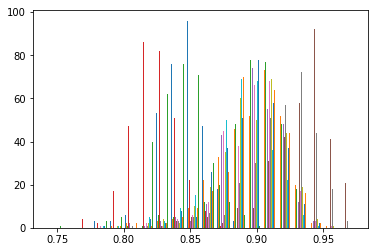

In [6]:
# Max pooling
dot_positive_max = np.dot(positive, anchor.T)
dot_negative_max = np.dot(negative, anchor.T)

max_dot = np.max(dot_positive_max, axis=0)
min_dot = np.min(dot_positive_max, axis=0)
mean_dot = np.mean(dot_positive_max, axis=0)

P.figure()
P.hist(dot_positive_max, bins=20)
P.show()